# Loading Libraries and Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from IPython.display import display
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.columns = train.columns.str.lower()
train.head()

,id,gender,age,driving_license,region_code,previously_insured,vehicle_age,vehicle_damage,annual_premium,policy_sales_channel,vintage,response
0,0,Male,21,1,35.0,0,1-2 Year,Yes,65101.0,124.0,187,0
1,1,Male,43,1,28.0,0,> 2 Years,Yes,58911.0,26.0,288,1
2,2,Female,25,1,14.0,1,< 1 Year,No,38043.0,152.0,254,0
3,3,Female,35,1,1.0,0,1-2 Year,Yes,2630.0,156.0,76,0
4,4,Female,36,1,15.0,1,1-2 Year,No,31951.0,152.0,294,0


In [3]:
display(train.describe())
display(train.describe(include=["O"]))

,id,age,driving_license,region_code,previously_insured,annual_premium,policy_sales_channel,vintage,response
count,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07
mean,5.752398e+06,3.838356e+01,9.980220e-01,2.641869e+01,4.629966e-01,3.046137e+04,1.124254e+02,1.638977e+02,1.229973e-01
std,3.321149e+06,1.499346e+01,4.443120e-02,1.299159e+01,4.986289e-01,1.645475e+04,5.403571e+01,7.997953e+01,3.284341e-01
min,0.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,2.630000e+03,1.000000e+00,1.000000e+01,0.000000e+00
25%,2.876199e+06,2.400000e+01,1.000000e+00,1.500000e+01,0.000000e+00,2.527700e+04,2.900000e+01,9.900000e+01,0.000000e+00
50%,5.752398e+06,3.600000e+01,1.000000e+00,2.800000e+01,0.000000e+00,3.182400e+04,1.510000e+02,1.660000e+02,0.000000e+00
75%,8.628598e+06,4.900000e+01,1.000000e+00,3.500000e+01,1.000000e+00,3.945100e+04,1.520000e+02,2.320000e+02,0.000000e+00
max,1.150480e+07,8.500000e+01,1.000000e+00,5.200000e+01,1.000000e+00,5.401650e+05,1.630000e+02,2.990000e+02,1.000000e+00


,gender,vehicle_age,vehicle_damage
count,11504798,11504798,11504798
unique,2,3,2
top,Male,1-2 Year,Yes
freq,6228134,5982678,5783229


# Outlier Treatment
## Quartile-based Detection

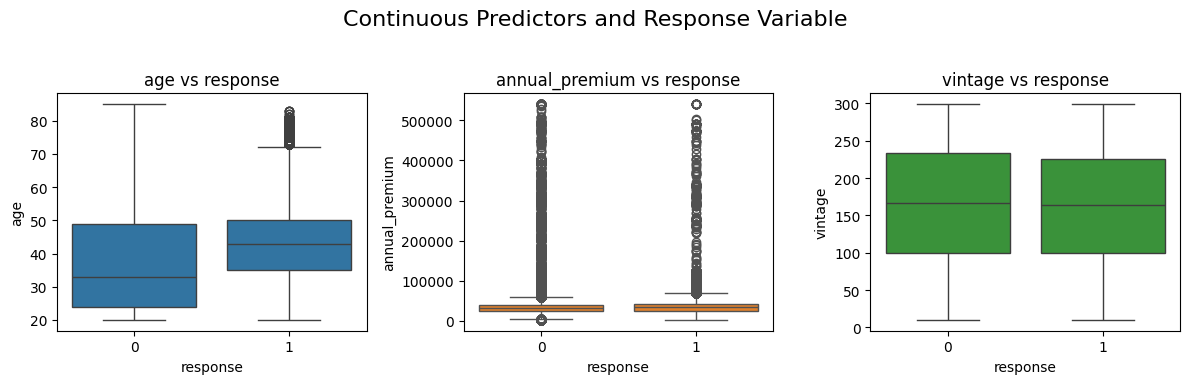

In [4]:
x = train[['age', 'annual_premium', 'vintage']]
y = train['response']

fig, axes = plt.subplots(nrows=1, ncols=len(x.columns), figsize=(4*len(x.columns), 4))

for i, c in enumerate(x.columns):
    sns.boxplot(x='response', y=c, data=train, ax=axes[i], color=sns.color_palette('tab10')[i])
    axes[i].set_title(f'{c} vs response')

fig.suptitle("Continuous Predictors and Response Variable", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to fit the suptitle
plt.show()

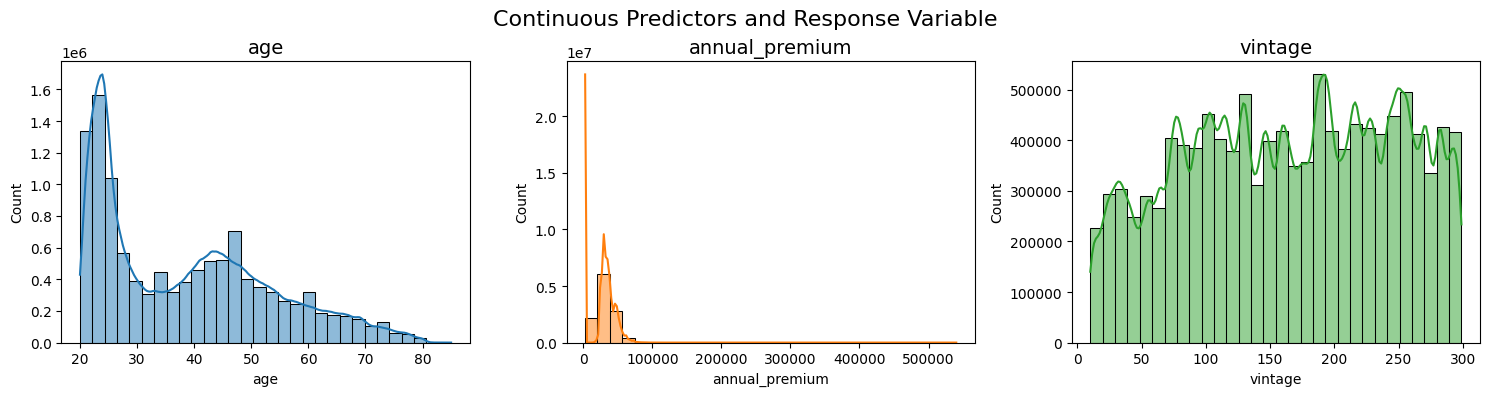

In [5]:
fig, axes = plt.subplots(nrows=1, ncols=len(x.columns), figsize=(5*len(x.columns), 4))

for i, c in enumerate(x.columns):
    sns.histplot(x=c, data=x, kde=True, ax=axes[i], color=sns.color_palette('tab10')[i], bins=30)
    axes[i].set_title(f'{c}', fontsize=14)

fig.suptitle("Continuous Predictors and Response Variable", fontsize=16)
plt.tight_layout()  
plt.subplots_adjust(top=0.85)  # Adjust top to fit suptitle
plt.show()

## Cleaning Outliers
Cleaning outliers of annual_premium 

In [6]:
Q1 = train['annual_premium'].quantile(0.25)
Q3 = train['annual_premium'].quantile(0.75)
IQR = Q3 - Q1

Lower_Whisker = Q1 - 1.5 * IQR
Upper_Whisker = Q3 + 1.5 * IQR

train['annual_premium'] = np.where(train['annual_premium'] > Upper_Whisker, Upper_Whisker, train['annual_premium'])
train['annual_premium'] = np.where(train['annual_premium'] < Lower_Whisker, Lower_Whisker, train['annual_premium'])


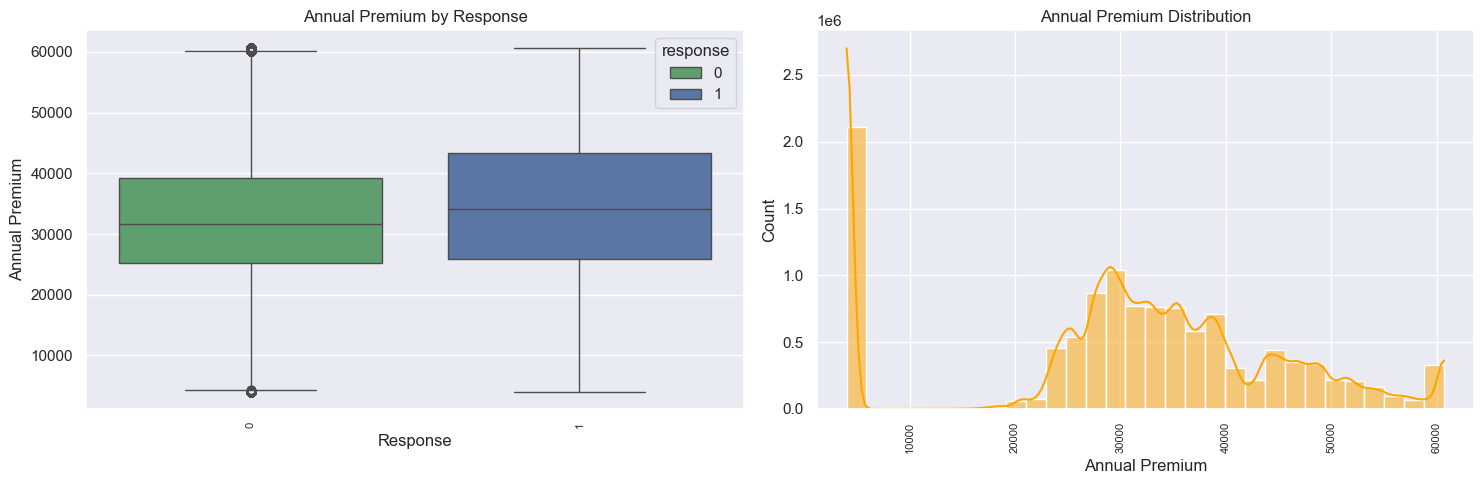

In [7]:
sns.set_theme(style="darkgrid")
my_pal = {0: "g", 1: "b"}

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.boxplot(x='response', y='annual_premium', data=train, hue='response', palette=my_pal, ax=axes[0])
axes[0].set_title('Annual Premium by Response')
axes[0].set_ylabel('Annual Premium')
axes[0].set_xlabel('Response')
axes[0].tick_params(axis='x', rotation=90, labelsize=8)

sns.histplot(x='annual_premium', data=train, kde=True, ax=axes[1], bins=30, color = 'orange')
axes[1].set_title('Annual Premium Distribution')
axes[1].set_ylabel('Count')
axes[1].set_xlabel('Annual Premium')
axes[1].tick_params(axis='x', rotation=90, labelsize=8)

plt.tight_layout()
plt.show()

Evaluating Scaling Transformation

In [8]:
num_features = ['annual_premium', 'vintage']
X= train[num_features]
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)
train_std = pd.DataFrame(X_normalized, columns=num_features, index=train.index)
train[num_features] = train_std
pd.set_option('display.float_format', '{:.4f}'.format)
train.describe()

,id,age,driving_license,region_code,previously_insured,annual_premium,policy_sales_channel,vintage,response
count,11504798.0000,11504798.0000,11504798.0000,11504798.0000,11504798.0000,11504798.0000,11504798.0000,11504798.0000,11504798.0000
mean,5752398.5000,38.3836,0.9980,26.4187,0.4630,0.4676,112.4254,0.5325,0.1230
std,3321149.2555,14.9935,0.0444,12.9916,0.4986,0.2689,54.0357,0.2767,0.3284
min,0.0000,20.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000
25%,2876199.2500,24.0000,1.0000,15.0000,0.0000,0.3750,29.0000,0.3080,0.0000
50%,5752398.5000,36.0000,1.0000,28.0000,0.0000,0.4905,151.0000,0.5398,0.0000
75%,8628597.7500,49.0000,1.0000,35.0000,1.0000,0.6250,152.0000,0.7682,0.0000
max,11504797.0000,85.0000,1.0000,52.0000,1.0000,1.0000,163.0000,1.0000,1.0000


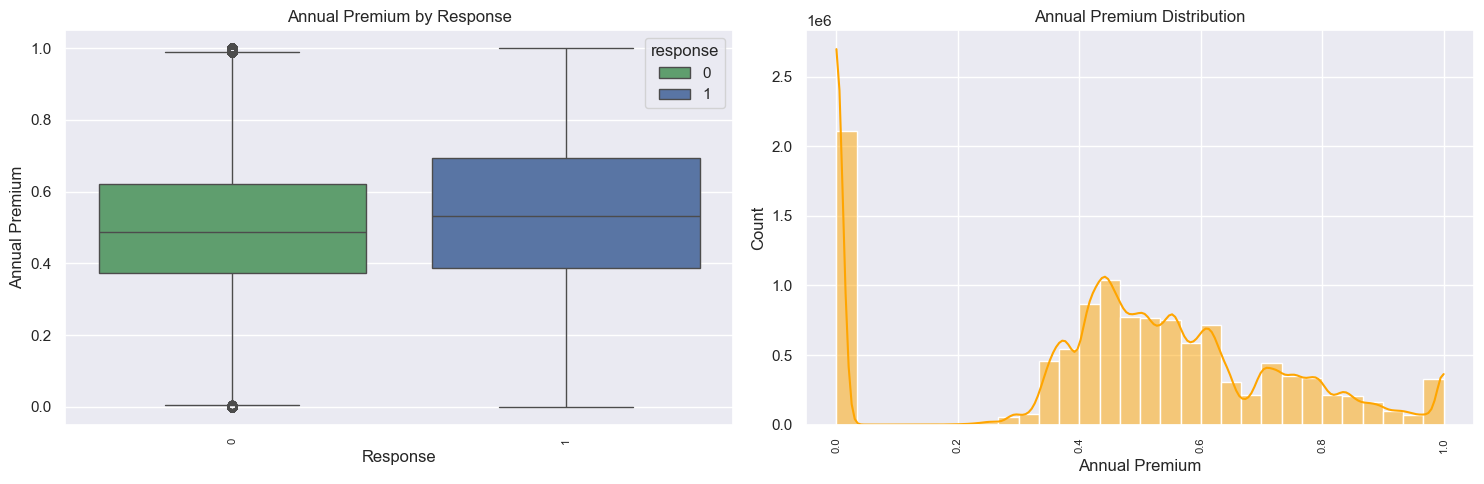

In [9]:
sns.set_theme(style="darkgrid")
my_pal = {0: "g", 1: "b"}

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.boxplot(x='response', y='annual_premium', data=train, hue='response', palette=my_pal, ax=axes[0])
axes[0].set_title('Annual Premium by Response')
axes[0].set_ylabel('Annual Premium')
axes[0].set_xlabel('Response')
axes[0].tick_params(axis='x', rotation=90, labelsize=8)

sns.histplot(x='annual_premium', data=train, kde=True, ax=axes[1], bins=30, color = 'orange')
axes[1].set_title('Annual Premium Distribution')
axes[1].set_ylabel('Count')
axes[1].set_xlabel('Annual Premium')
axes[1].tick_params(axis='x', rotation=90, labelsize=8)

plt.tight_layout()
plt.show()

## EDA

### Age Exploration

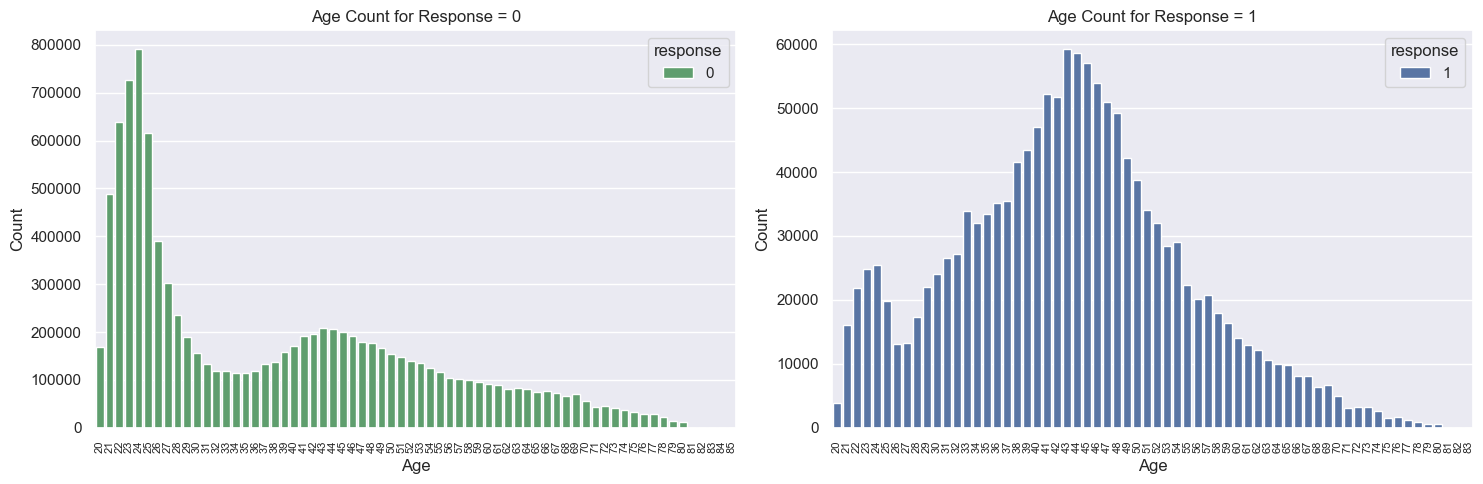

In [10]:
train_response_0 = train[train['response'] == 0]
train_response_1 = train[train['response'] == 1]
my_pal = {0: "g", 1: "b"}
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.countplot(x='age', data=train_response_0, ax=axes[0], hue = 'response', palette= my_pal)
axes[0].set_title('Age Count for Response = 0')
axes[0].set_ylabel('Count')
axes[0].set_xlabel('Age')
axes[0].tick_params(axis='x', rotation=90, labelsize=8)


sns.countplot(x='age', data=train_response_1, ax=axes[1],  hue = 'response', palette= my_pal)
axes[1].set_title('Age Count for Response = 1')
axes[1].set_ylabel('Count')
axes[1].set_xlabel('Age')
axes[1].tick_params(axis='x', rotation=90, labelsize=8)

plt.tight_layout()
plt.show()

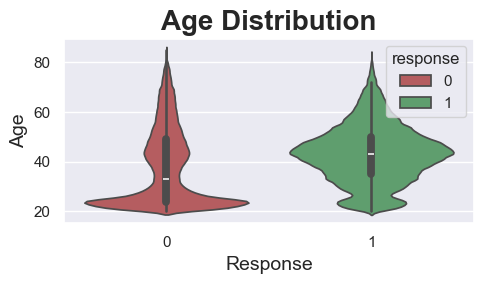

In [11]:
my_pal = {0: "r", 1: "g"}
plt.figure(figsize=(5,3))
sns.violinplot(y = 'age', data = train, x='response', hue = 'response',palette= my_pal) 
plt.xlabel(xlabel = 'Response', fontdict={'fontsize': 14})
plt.ylabel(ylabel = 'Age', fontdict={'fontsize': 14})
plt.title('Age Distribution', fontdict={'fontsize': 20, 'fontweight':'bold'})

plt.tight_layout()
plt.show()

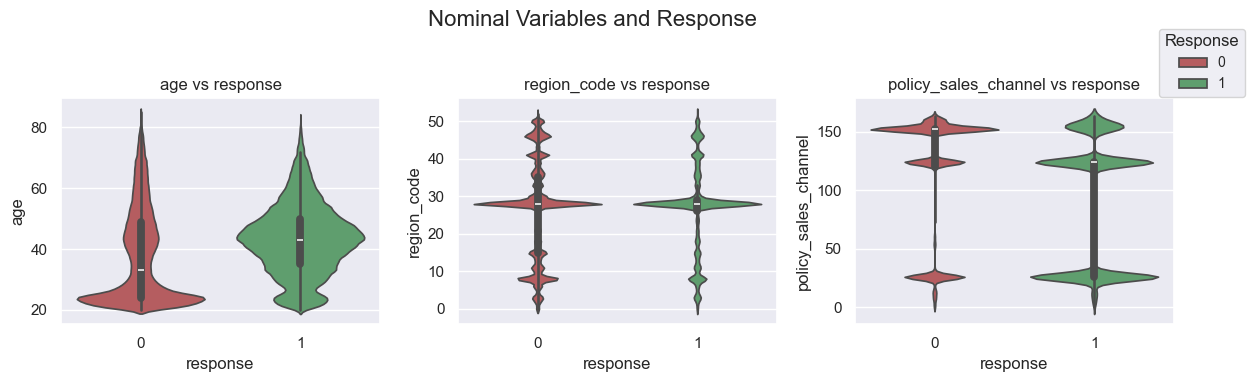

In [12]:
my_pal = {0: "r", 1: "g"}
gender_pal = {'Male': 'b', 'Female':'p'}
x = train[['age', 'region_code', 'policy_sales_channel']]
y = train['response']

fig, axes = plt.subplots(nrows=1, ncols=len(x.columns), figsize=(4*len(x.columns), 4))

for i, c in enumerate(x.columns):
    sns.violinplot(x='response', y=c, data=train, ax=axes[i], hue='response', palette=my_pal) 
    axes[i].set_title(f'{c} vs response')
    axes[i].get_legend().remove()

handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', bbox_to_anchor=(1.05, 0.95), fontsize='small', title='Response')

fig.suptitle("Nominal Variables and Response", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  
plt.show()

In [13]:
train['age'].describe()

count   11504798.0000
mean          38.3836
std           14.9935
min           20.0000
25%           24.0000
50%           36.0000
75%           49.0000
max           85.0000
Name: age, dtype: float64

Age Groups:

    Young Adults: 20-29
    Adults: 30-39
    Middle-aged Adults: 40-49
    Older Adults: 50-59
    Seniors: 60 and above

In [14]:
train_df1 = train.copy()
bins = [20, 29, 39, 49, 59, 85]
labels = ['20-29', '30-39', '40-49', '50-59', '60+']
train_df1.insert(1, 'age_group', pd.cut(train_df1['age'], bins=bins, labels=labels, right=True))
train_df1.drop(['age'], axis = 1, inplace = True)
train_df1.head()

,id,age_group,gender,driving_license,region_code,previously_insured,vehicle_age,vehicle_damage,annual_premium,policy_sales_channel,vintage,response
0,0,20-29,Male,1,35.0000,0,1-2 Year,Yes,1.0000,124.0000,0.6125,0
1,1,40-49,Male,1,28.0000,0,> 2 Years,Yes,0.9682,26.0000,0.9619,1
2,2,20-29,Female,1,14.0000,1,< 1 Year,No,0.6002,152.0000,0.8443,0
3,3,30-39,Female,1,1.0000,0,1-2 Year,Yes,0.0000,156.0000,0.2284,0
4,4,30-39,Female,1,15.0000,1,1-2 Year,No,0.4927,152.0000,0.9827,0


In [15]:
train_df1.head()

,id,age_group,gender,driving_license,region_code,previously_insured,vehicle_age,vehicle_damage,annual_premium,policy_sales_channel,vintage,response
0,0,20-29,Male,1,35.0000,0,1-2 Year,Yes,1.0000,124.0000,0.6125,0
1,1,40-49,Male,1,28.0000,0,> 2 Years,Yes,0.9682,26.0000,0.9619,1
2,2,20-29,Female,1,14.0000,1,< 1 Year,No,0.6002,152.0000,0.8443,0
3,3,30-39,Female,1,1.0000,0,1-2 Year,Yes,0.0000,156.0000,0.2284,0
4,4,30-39,Female,1,15.0000,1,1-2 Year,No,0.4927,152.0000,0.9827,0


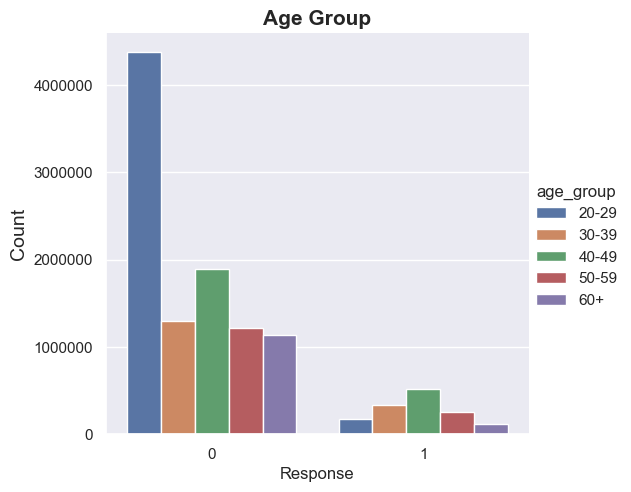

In [16]:
sns.catplot(x="response", hue="age_group", kind="count",
                data=train_df1)
plt.xlabel('Response', fontdict={'fontsize':12})
plt.ylabel('Count',fontdict={'fontsize': 14})
plt.title('Age Group', fontdict={'fontsize': 15, 'fontweight':'bold'})
plt.ticklabel_format(style='plain', axis='y')
plt.show()


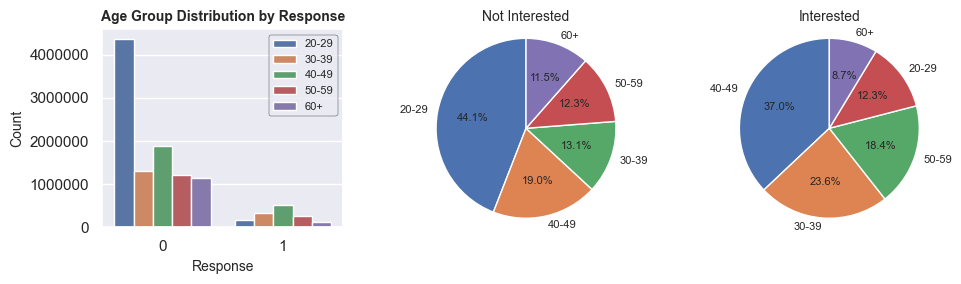

In [17]:
train_response_1 = train_df1[train_df1['response'] == 1]
y1 = train_response_1['age_group'].value_counts()
train_response_0 = train_df1[train_df1['response'] == 0]
y0 = train_response_0['age_group'].value_counts()

fig, axes = plt.subplots(1, 3, figsize=(10, 3))
sns.countplot(x="response", hue="age_group", data=train_df1, ax=axes[0])
axes[0].set_xlabel('Response', fontsize=10)
axes[0].set_ylabel('Count', fontsize=10)
axes[0].set_title('Age Group Distribution by Response', fontsize=10, fontweight='bold')
axes[0].ticklabel_format(style='plain', axis='y')
legend = axes[0].legend(fontsize=8) 
legend.get_frame().set_linewidth(0.3)  
legend.get_frame().set_edgecolor('black')

axes[1].pie(y0.values, labels=y0.index, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 8})
axes[1].set_title("Not Interested", fontsize=10)
axes[1].axis('equal')

axes[2].pie(y1.values, labels=y1.index, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 8})
axes[2].set_title("Interested", fontsize=10)
axes[2].axis('equal')

plt.tight_layout()
plt.show()

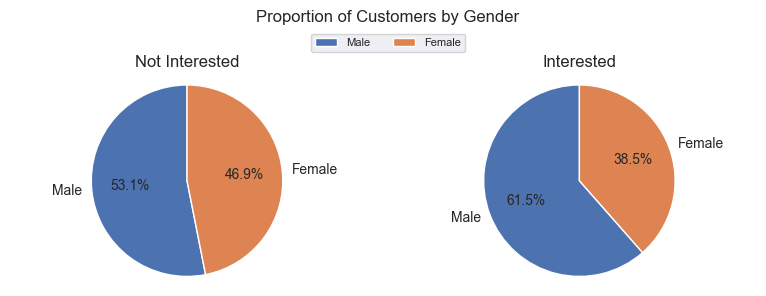

In [18]:
train_response_1 = train[train['response'] == 1]
y1 = train_response_1['gender'].value_counts()
train_response_0 = train[train['response'] == 0]
y0 = train_response_0['gender'].value_counts()

fig, axes = plt.subplots(1, 2, figsize=(8, 3))

axes[0].pie(y0.values, labels=y0.index, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 10})
axes[0].set_title("Not Interested", fontsize=12)
axes[0].axis('equal')

axes[1].pie(y1.values, labels=y1.index, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 10})
axes[1].set_title("Interested", fontsize=12)
axes[1].axis('equal')

labels = y0.index
fig.legend(labels, loc='upper center', fontsize=8, ncol=len(labels), bbox_to_anchor=(0.5, 0.92))
fig.suptitle("Proportion of Customers by Gender", fontsize=12)

plt.tight_layout()
plt.show()

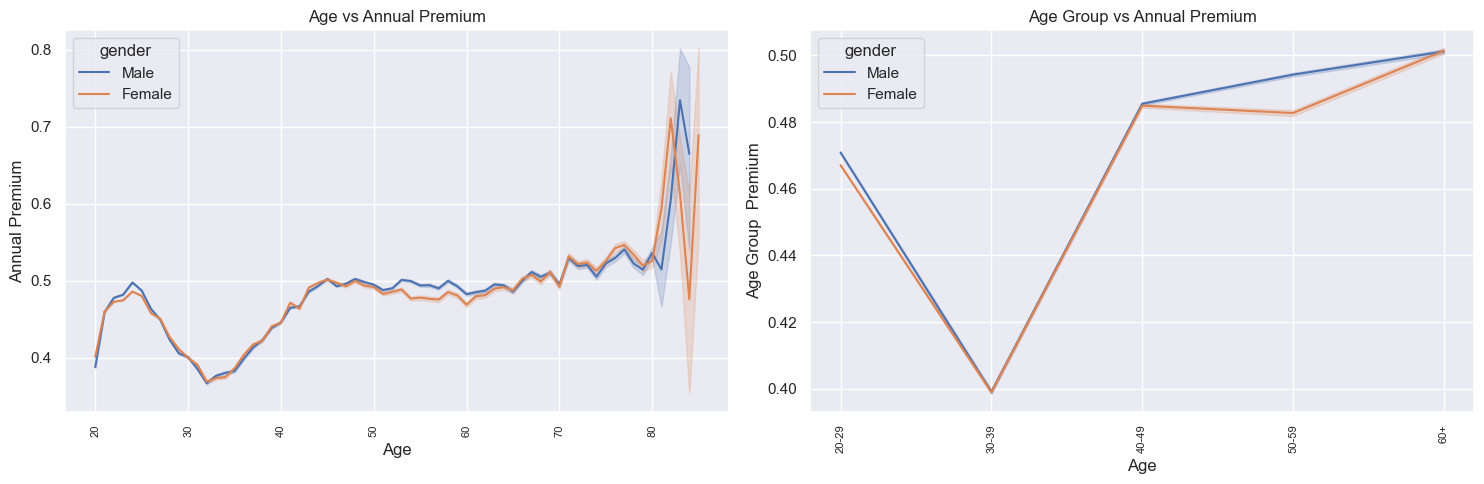

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.lineplot(x='age', y='annual_premium', ax=axes[0], data=train, hue = 'gender')
axes[0].set_title('Age vs Annual Premium')
axes[0].set_ylabel('Annual Premium')
axes[0].set_xlabel('Age')
axes[0].tick_params(axis='x', rotation=90, labelsize=8)

sns.lineplot(x='age_group', y='annual_premium',ax=axes[1],  data=train_df1, hue = 'gender')
axes[1].set_title('Age Group vs Annual Premium')
axes[1].set_ylabel('Age Group  Premium')
axes[1].set_xlabel('Age')
axes[1].tick_params(axis='x', rotation=90, labelsize=8)
plt.tight_layout()
plt.show()

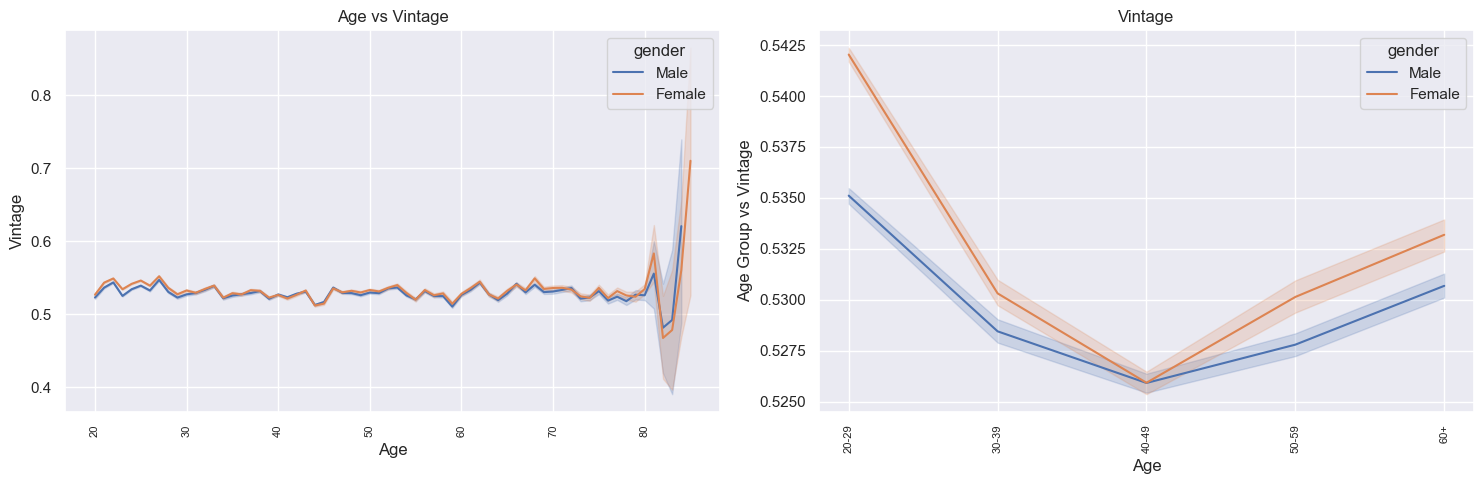

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.lineplot(x='age', y='vintage', ax=axes[0], data=train, hue = 'gender')
axes[0].set_title('Age vs Vintage')
axes[0].set_ylabel('Vintage')
axes[0].set_xlabel('Age')
axes[0].tick_params(axis='x', rotation=90, labelsize=8)

sns.lineplot(x='age_group', y='vintage',ax=axes[1],  data=train_df1, hue = 'gender')
axes[1].set_title('Vintage')
axes[1].set_ylabel('Age Group vs Vintage')
axes[1].set_xlabel('Age')
axes[1].tick_params(axis='x', rotation=90, labelsize=8)
plt.tight_layout()
plt.show()

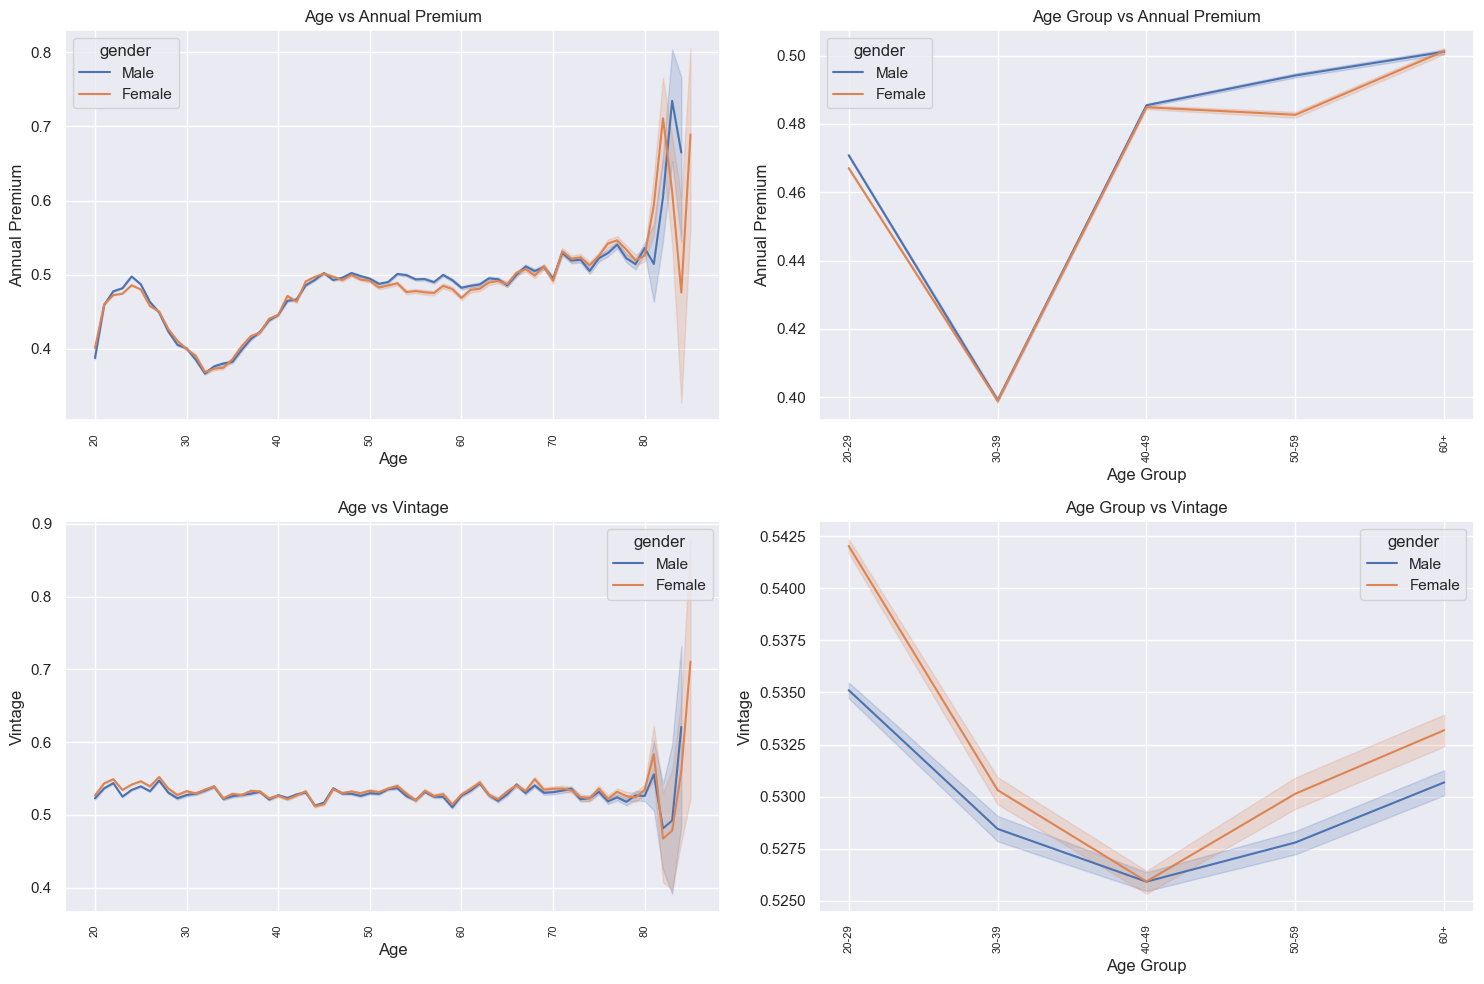

In [21]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

# First plot: Age vs Annual Premium
sns.lineplot(x='age', y='annual_premium', ax=axes[0], data=train, hue='gender')
axes[0].set_title('Age vs Annual Premium')
axes[0].set_ylabel('Annual Premium')
axes[0].set_xlabel('Age')
axes[0].tick_params(axis='x', rotation=90, labelsize=8)

# Second plot: Age Group vs Annual Premium
sns.lineplot(x='age_group', y='annual_premium', ax=axes[1], data=train_df1, hue='gender')
axes[1].set_title('Age Group vs Annual Premium')
axes[1].set_ylabel('Annual Premium')
axes[1].set_xlabel('Age Group')
axes[1].tick_params(axis='x', rotation=90, labelsize=8)

# Third plot: Age vs Vintage
sns.lineplot(x='age', y='vintage', ax=axes[2], data=train, hue='gender')
axes[2].set_title('Age vs Vintage')
axes[2].set_ylabel('Vintage')
axes[2].set_xlabel('Age')
axes[2].tick_params(axis='x', rotation=90, labelsize=8)

# Fourth plot: Age Group vs Vintage
sns.lineplot(x='age_group', y='vintage', ax=axes[3], data=train_df1, hue='gender')
axes[3].set_title('Age Group vs Vintage')
axes[3].set_ylabel('Vintage')
axes[3].set_xlabel('Age Group')
axes[3].tick_params(axis='x', rotation=90, labelsize=8)

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Vehicle_Age V/S Annual_Premium')

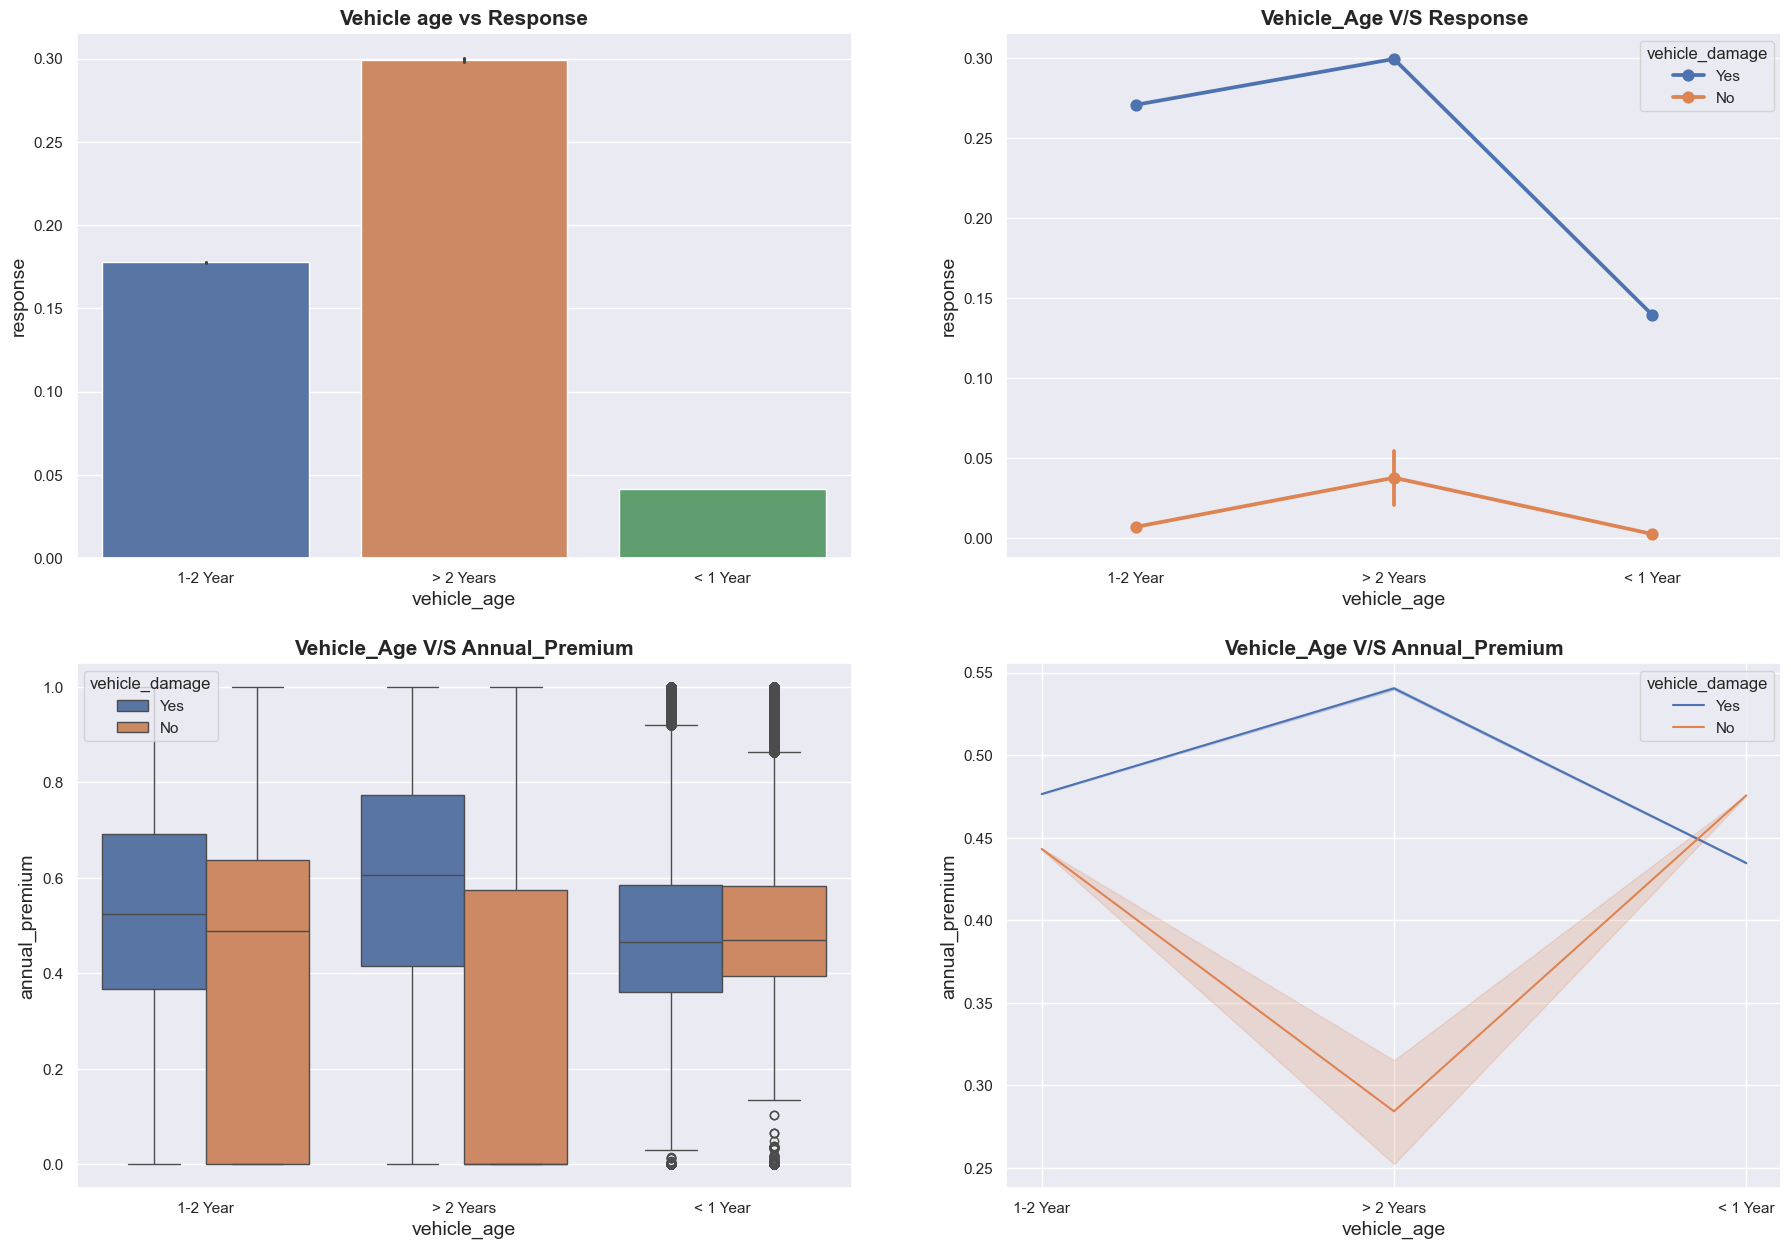

In [26]:
fig, axes = plt.subplots(2, 2, figsize=(22, 15))

sns.barplot(ax=axes[0, 0], x='vehicle_age', y='response', hue='vehicle_age', data=train_df1)
axes[0, 0].set_xlabel('vehicle_age', fontsize=14)
axes[0, 0].set_ylabel('response', fontsize=14)
axes[0, 0].set_title('Vehicle age vs Response', fontsize=15, fontweight='bold')

sns.pointplot(ax=axes[0, 1], y='response', x='vehicle_age', hue='vehicle_damage', data=train_df1)
axes[0, 1].set_xlabel('vehicle_age', fontsize=14)
axes[0, 1].set_ylabel('response', fontsize=14)
axes[0, 1].set_title('Vehicle_Age V/S Response', fontsize=15, fontweight='bold')

sns.boxplot(ax=axes[1, 0], y='annual_premium', x='vehicle_age', hue='vehicle_damage', data=train_df1)
axes[1, 0].set_xlabel('vehicle_age', fontsize=14)
axes[1, 0].set_ylabel('annual_premium', fontsize=14)
axes[1, 0].set_title('Vehicle_Age V/S Annual_Premium', fontsize=15, fontweight='bold')

sns.lineplot(ax=axes[1, 1], x='vehicle_age', y='annual_premium', hue='vehicle_damage', data=train_df1)
axes[1, 1].set_xlabel('vehicle_age', fontsize=14)
axes[1, 1].set_ylabel('annual_premium', fontsize=14)
axes[1, 1].set_title('Vehicle_Age V/S Annual_Premium', fontsize=15, fontweight='bold')

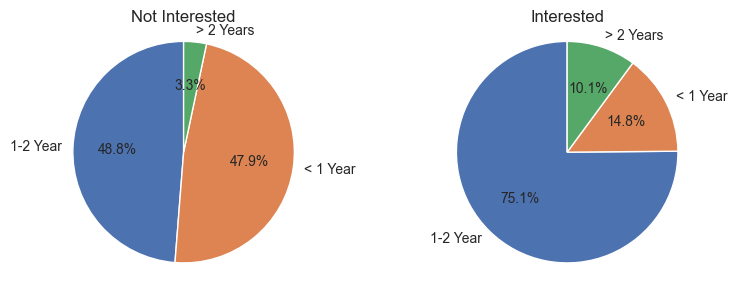

In [30]:
train_response_1 = train[train['response'] == 1]
train_response_0 = train[train['response'] == 0]
vehicle_age_dist_1 = train_response_1['vehicle_age'].value_counts(normalize=True)
vehicle_age_dist_0 = train_response_0['vehicle_age'].value_counts(normalize=True)

fig, axes = plt.subplots(2, 2, figsize=(8, 3))

axes[0].pie(vehicle_age_dist_0, labels=vehicle_age_dist_0.index, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 10})
axes[0].set_title("Not Interested", fontsize=12)
axes[0].axis('equal')

axes[1].pie(vehicle_age_dist_1, labels=vehicle_age_dist_1.index, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 10})
axes[1].set_title("Interested", fontsize=12)
axes[1].axis('equal')

plt.tight_layout()
plt.show()



train_response_1 = train[train['response'] == 1]
train_response_0 = train[train['response'] == 0]
vehicle_dmg_dist_1 = train_response_1['vehicle_damage'].value_counts(normalize=True)
vehicle_dmg_dist_0 = train_response_0['vehicle_damage'].value_counts(normalize=True)

fig, axes = plt.subplots(1, 2, figsize=(8, 3))

axes[0].pie(vehicle_dmg_dist_0, labels=vehicle_dmg_dist_0.index, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 10})
axes[0].set_title("Not Interested", fontsize=12)
axes[0].axis('equal')

axes[1].pie(vehicle_dmg_dist_1, labels=vehicle_dmg_dist_1.index, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 10})
axes[1].set_title("Interested", fontsize=12)
axes[1].axis('equal')

plt.tight_layout()
plt.show()

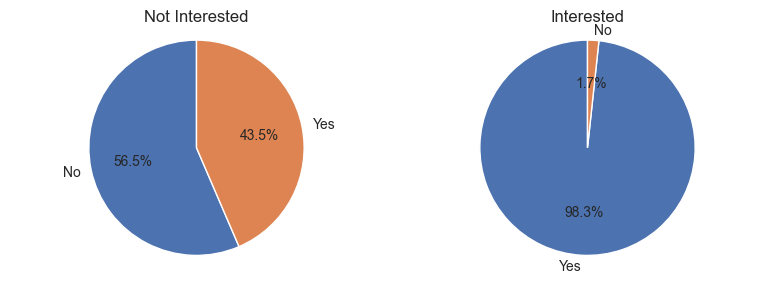

In [31]:
train_response_1 = train[train['response'] == 1]
train_response_0 = train[train['response'] == 0]
vehicle_dmg_dist_1 = train_response_1['vehicle_damage'].value_counts(normalize=True)
vehicle_dmg_dist_0 = train_response_0['vehicle_damage'].value_counts(normalize=True)

fig, axes = plt.subplots(1, 2, figsize=(8, 3))

axes[0].pie(vehicle_dmg_dist_0, labels=vehicle_dmg_dist_0.index, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 10})
axes[0].set_title("Not Interested", fontsize=12)
axes[0].axis('equal')

axes[1].pie(vehicle_dmg_dist_1, labels=vehicle_dmg_dist_1.index, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 10})
axes[1].set_title("Interested", fontsize=12)
axes[1].axis('equal')

plt.tight_layout()
plt.show()

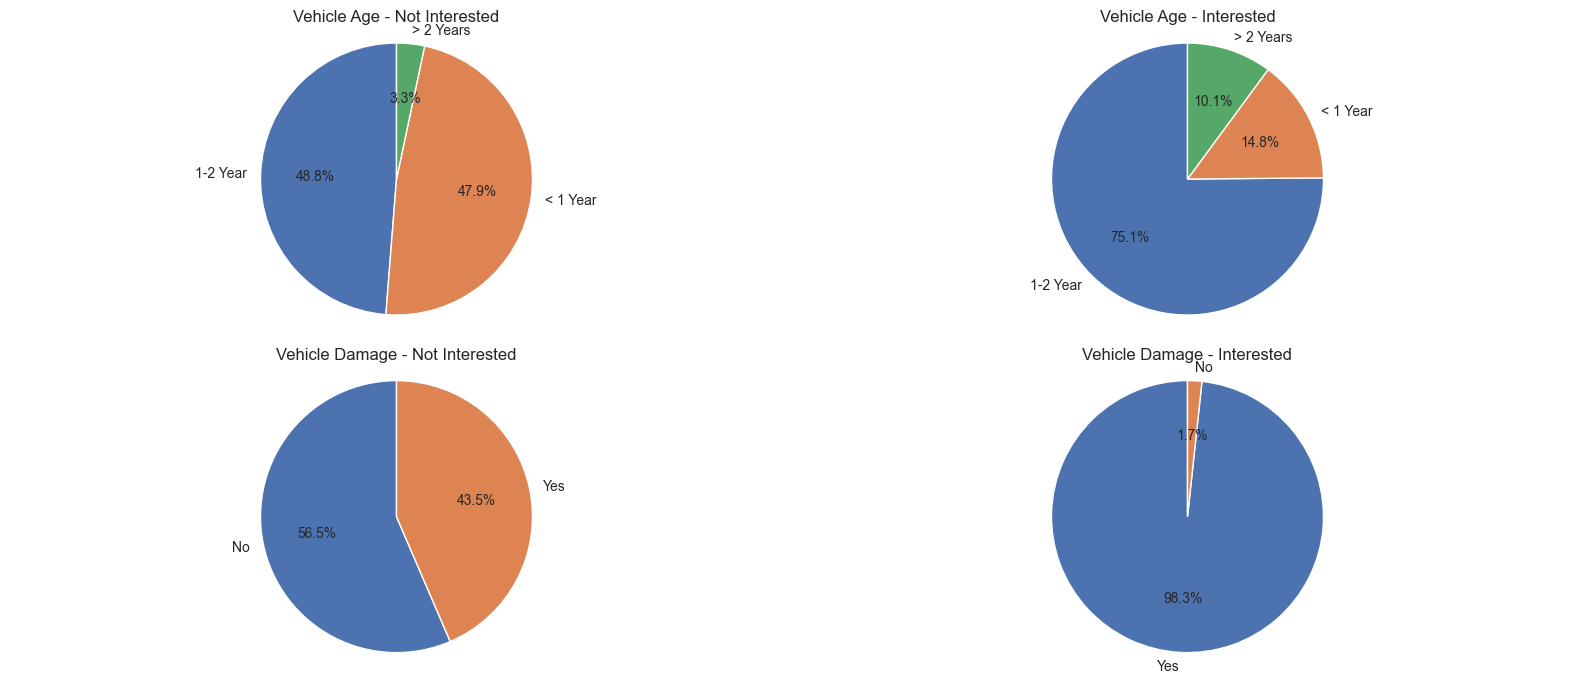

In [41]:
train_response_1 = train[train['response'] == 1]
train_response_0 = train[train['response'] == 0]
vehicle_age_dist_1 = train_response_1['vehicle_age'].value_counts(normalize=True)
vehicle_age_dist_0 = train_response_0['vehicle_age'].value_counts(normalize=True)
vehicle_dmg_dist_1 = train_response_1['vehicle_damage'].value_counts(normalize=True)
vehicle_dmg_dist_0 = train_response_0['vehicle_damage'].value_counts(normalize=True)

fig, axes = plt.subplots(2, 2, figsize=(16, 7))

axes[0, 0].pie(vehicle_age_dist_0, labels=vehicle_age_dist_0.index, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 10})
axes[0, 0].set_title("Vehicle Age - Not Interested", fontsize=12)
axes[0, 0].axis('equal')

axes[0, 1].pie(vehicle_age_dist_1, labels=vehicle_age_dist_1.index, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 10})
axes[0, 1].set_title("Vehicle Age - Interested", fontsize=12)
axes[0, 1].axis('equal')

axes[1, 0].pie(vehicle_dmg_dist_0, labels=vehicle_dmg_dist_0.index, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 10})
axes[1, 0].set_title("Vehicle Damage - Not Interested", fontsize=12)
axes[1, 0].axis('equal')

axes[1, 1].pie(vehicle_dmg_dist_1, labels=vehicle_dmg_dist_1.index, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 10})
axes[1, 1].set_title("Vehicle Damage - Interested", fontsize=12)
axes[1, 1].axis('equal')

plt.tight_layout()
plt.show()

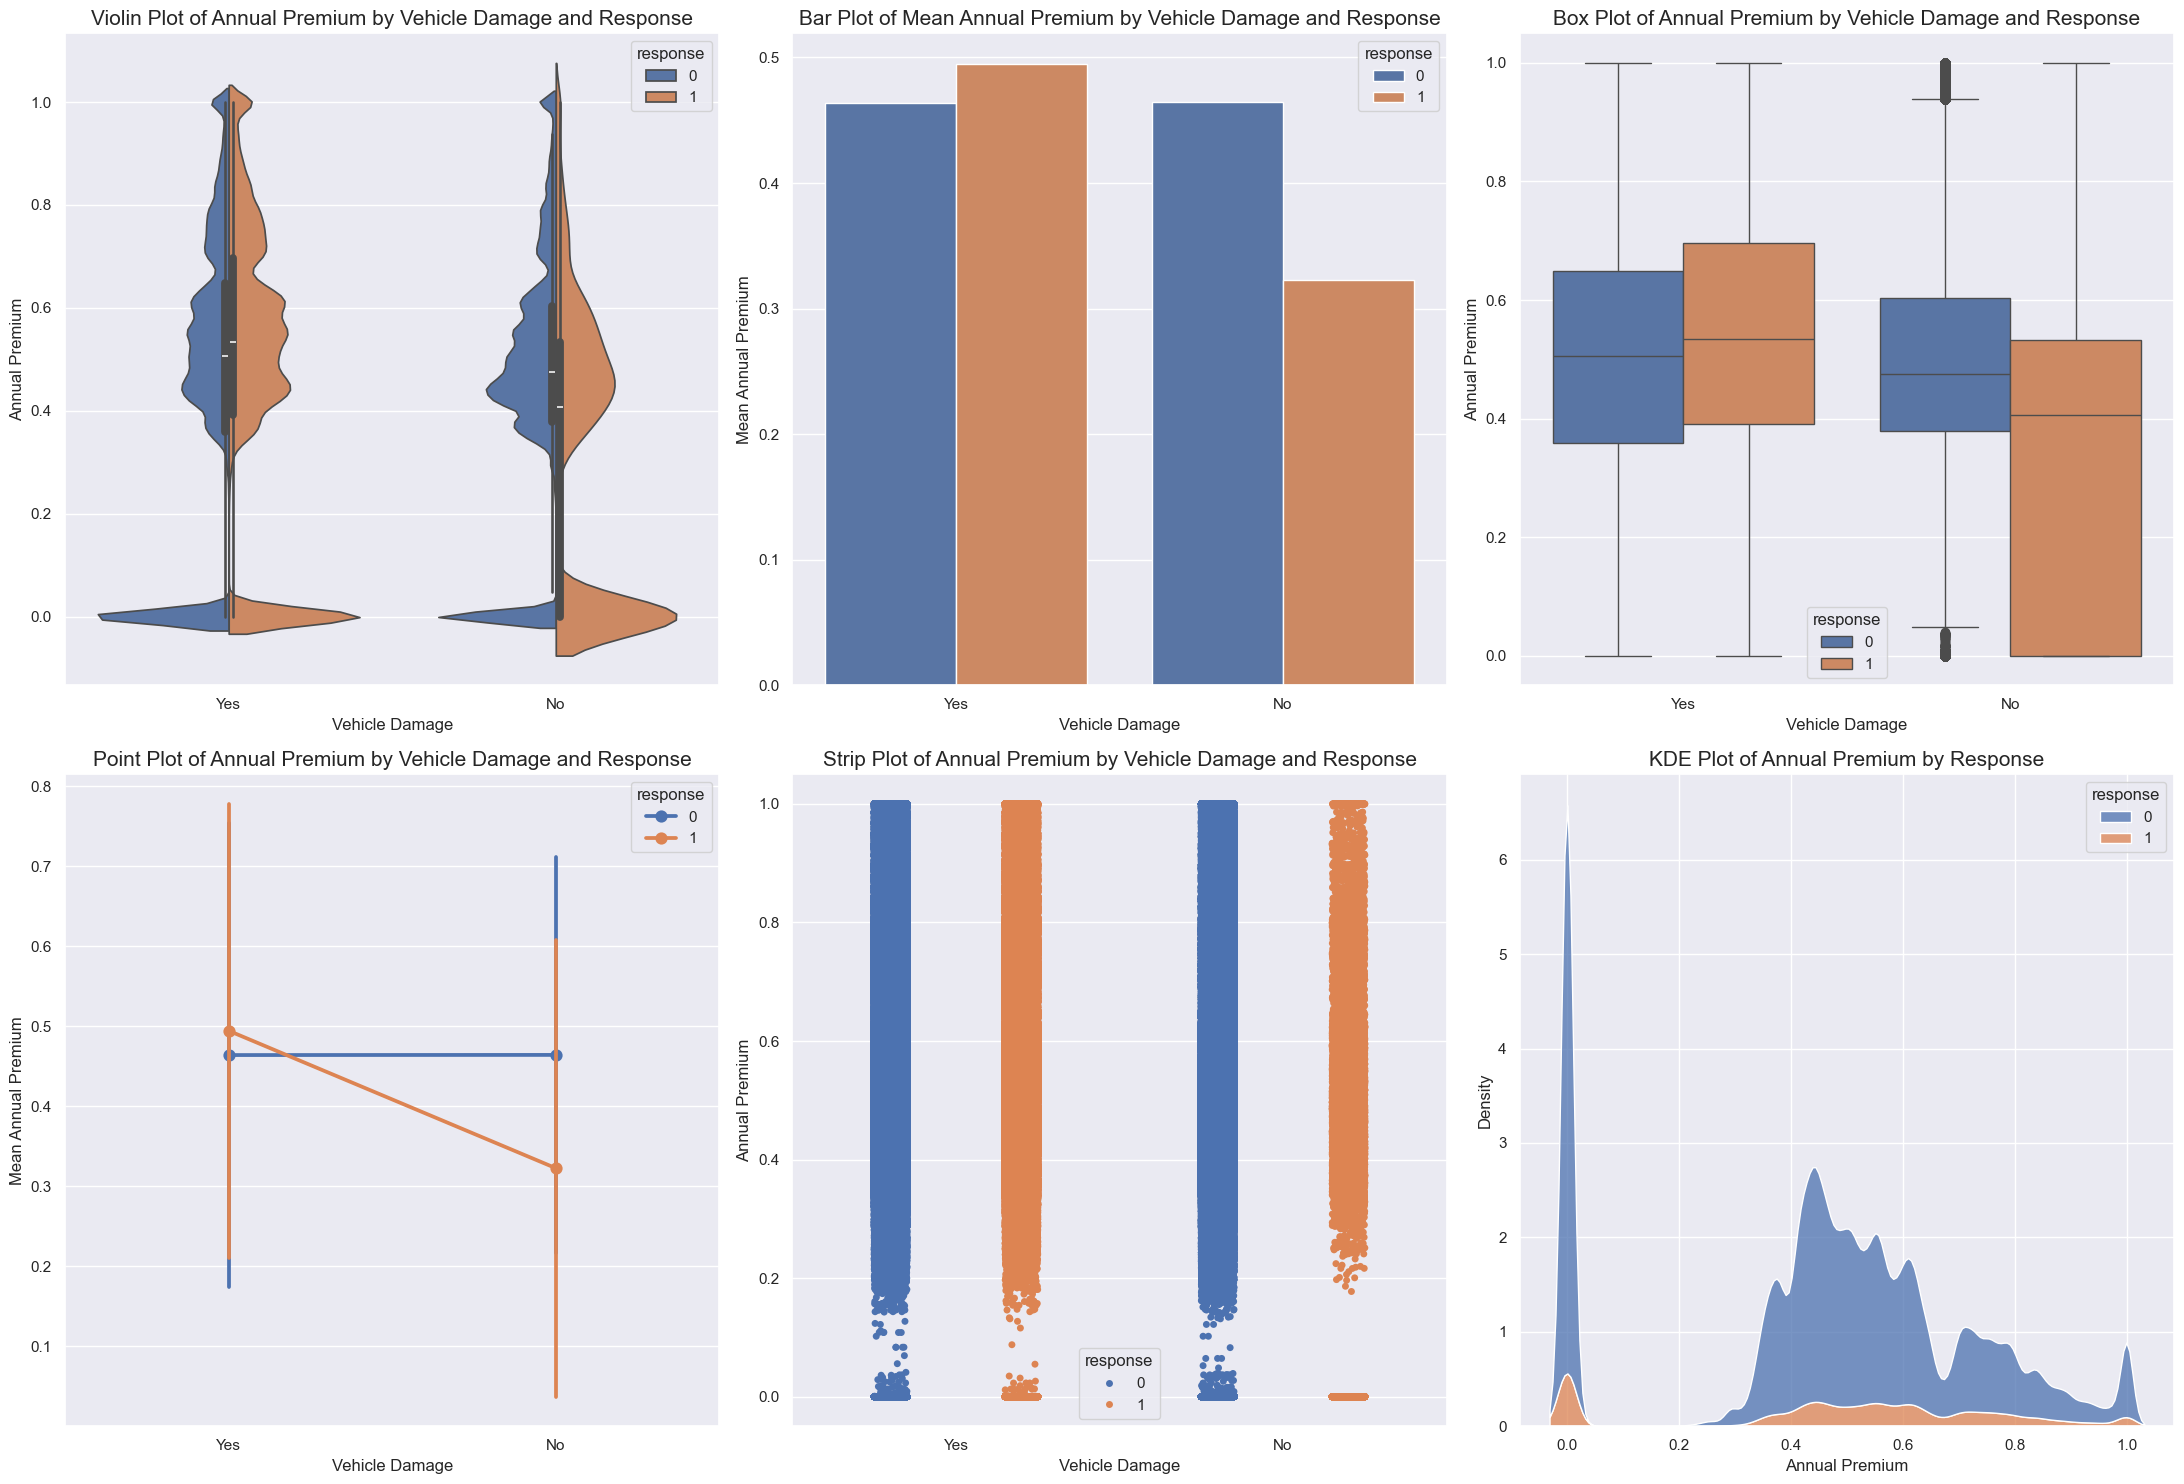

In [60]:
fig, axes = plt.subplots(2, 3, figsize=(22, 15))

# Violin Plot
sns.violinplot(ax=axes[0, 0], x='vehicle_damage', y='annual_premium', hue='response', data=train, split=True)
axes[0, 0].set_title('Violin Plot of Annual Premium by Vehicle Damage and Response', fontsize=15)
axes[0, 0].set_xlabel('Vehicle Damage', fontsize=12)
axes[0, 0].set_ylabel('Annual Premium', fontsize=12)

# Bar Plot
sns.barplot(ax=axes[0, 1], x='vehicle_damage', y='annual_premium', hue='response', data=train, estimator=np.mean, errorbar=None)
axes[0, 1].set_title('Bar Plot of Mean Annual Premium by Vehicle Damage and Response', fontsize=15)
axes[0, 1].set_xlabel('Vehicle Damage', fontsize=12)
axes[0, 1].set_ylabel('Mean Annual Premium', fontsize=12)

# Box Plot
sns.boxplot(ax=axes[0, 2], x='vehicle_damage', y='annual_premium', hue='response', data=train)
axes[0, 2].set_title('Box Plot of Annual Premium by Vehicle Damage and Response', fontsize=15)
axes[0, 2].set_xlabel('Vehicle Damage', fontsize=12)
axes[0, 2].set_ylabel('Annual Premium', fontsize=12)

# Point Plot
sns.pointplot(ax=axes[1, 0], x='vehicle_damage', y='annual_premium', hue='response', data=train, errorbar='sd')
axes[1, 0].set_title('Point Plot of Annual Premium by Vehicle Damage and Response', fontsize=15)
axes[1, 0].set_xlabel('Vehicle Damage', fontsize=12)
axes[1, 0].set_ylabel('Mean Annual Premium', fontsize=12)


# Strip Plot
sns.stripplot(ax=axes[1, 1], x='vehicle_damage', y='annual_premium', hue='response', data=train, jitter=True, dodge=True)
axes[1, 1].set_title('Strip Plot of Annual Premium by Vehicle Damage and Response', fontsize=15)
axes[1, 1].set_xlabel('Vehicle Damage', fontsize=12)
axes[1, 1].set_ylabel('Annual Premium', fontsize=12)

# KDE Plot
sns.kdeplot(ax=axes[1, 2], data=train, x='annual_premium', hue='response', multiple='stack')
axes[1, 2].set_title('KDE Plot of Annual Premium by Response', fontsize=15)
axes[1, 2].set_xlabel('Annual Premium', fontsize=12)
axes[1, 2].set_ylabel('Density', fontsize=12)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

C:\Users\KT\AppData\Local\Temp\ipykernel_20512\1995903443.py:41: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
C:\Users\KT\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


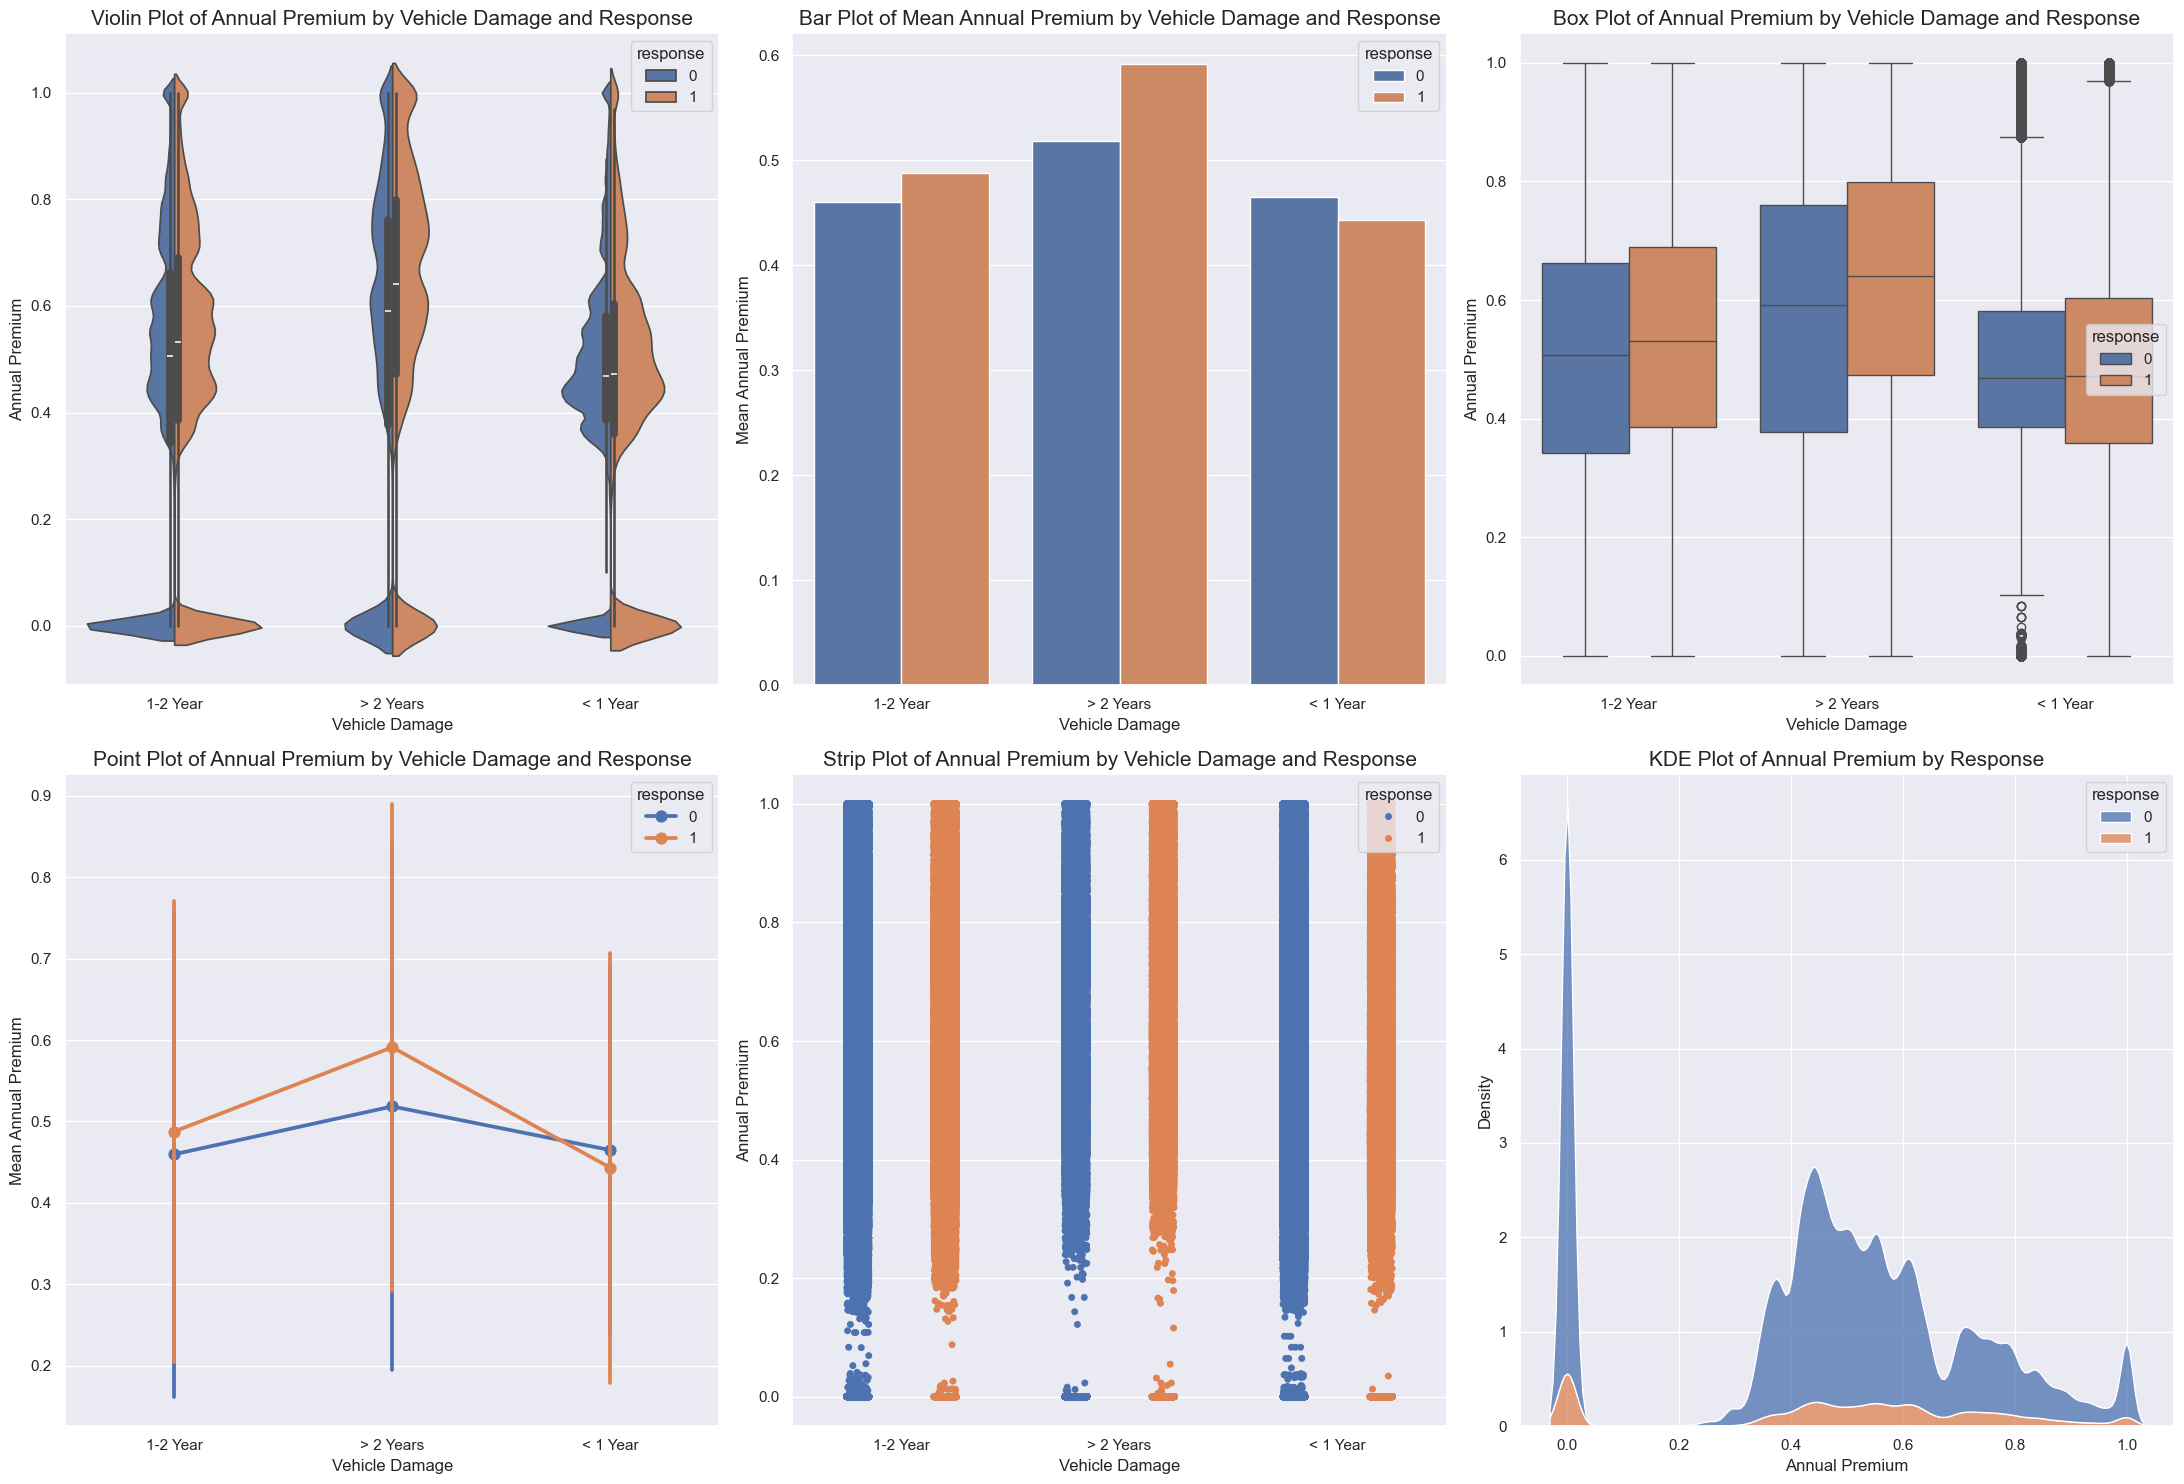

In [61]:
fig, axes = plt.subplots(2, 3, figsize=(22, 15))

# Violin Plot
sns.violinplot(ax=axes[0, 0], x='vehicle_age', y='annual_premium', hue='response', data=train, split=True)
axes[0, 0].set_title('Violin Plot of Annual Premium by Vehicle Damage and Response', fontsize=15)
axes[0, 0].set_xlabel('Vehicle Damage', fontsize=12)
axes[0, 0].set_ylabel('Annual Premium', fontsize=12)

# Bar Plot
sns.barplot(ax=axes[0, 1], x='vehicle_age', y='annual_premium', hue='response', data=train, estimator=np.mean, errorbar=None)
axes[0, 1].set_title('Bar Plot of Mean Annual Premium by Vehicle Damage and Response', fontsize=15)
axes[0, 1].set_xlabel('Vehicle Damage', fontsize=12)
axes[0, 1].set_ylabel('Mean Annual Premium', fontsize=12)

# Box Plot
sns.boxplot(ax=axes[0, 2], x='vehicle_age', y='annual_premium', hue='response', data=train)
axes[0, 2].set_title('Box Plot of Annual Premium by Vehicle Damage and Response', fontsize=15)
axes[0, 2].set_xlabel('Vehicle Damage', fontsize=12)
axes[0, 2].set_ylabel('Annual Premium', fontsize=12)

# Point Plot
sns.pointplot(ax=axes[1, 0], x='vehicle_age', y='annual_premium', hue='response', data=train, errorbar='sd')
axes[1, 0].set_title('Point Plot of Annual Premium by Vehicle Damage and Response', fontsize=15)
axes[1, 0].set_xlabel('Vehicle Damage', fontsize=12)
axes[1, 0].set_ylabel('Mean Annual Premium', fontsize=12)


# Strip Plot
sns.stripplot(ax=axes[1, 1], x='vehicle_age', y='annual_premium', hue='response', data=train, jitter=True, dodge=True)
axes[1, 1].set_title('Strip Plot of Annual Premium by Vehicle Damage and Response', fontsize=15)
axes[1, 1].set_xlabel('Vehicle Damage', fontsize=12)
axes[1, 1].set_ylabel('Annual Premium', fontsize=12)

# KDE Plot
sns.kdeplot(ax=axes[1, 2], data=train, x='annual_premium', hue='response', multiple='stack')
axes[1, 2].set_title('KDE Plot of Annual Premium by Response', fontsize=15)
axes[1, 2].set_xlabel('Annual Premium', fontsize=12)
axes[1, 2].set_ylabel('Density', fontsize=12)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

Featuer Selection

In [68]:
cols_to_drop = ['id', 'driving_license']
train_df1.drop(columns = cols_to_drop, inplace = True)

KeyError: "['id', 'driving_license'] not found in axis"

In [72]:
continuous_features = train_df1.select_dtypes(include=['int64', 'float64']).columns
categorical_features = train_df1.select_dtypes(include=['object', 'category']).columns

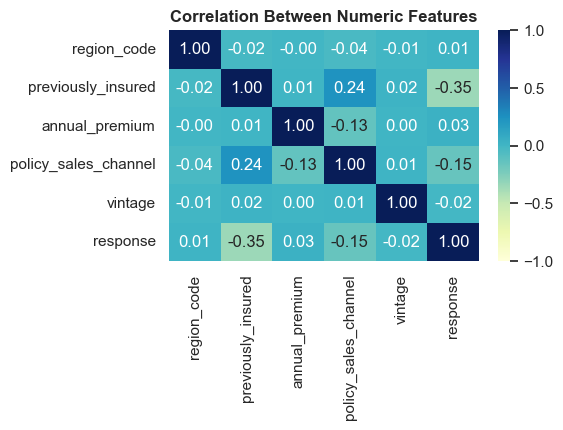

In [79]:
corr_matrix = train_df1[continuous_features].corr(method='pearson')
plt.figure(figsize=(5, 3))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='YlGnBu', vmin=-1, vmax=1)
plt.title('Correlation Between Numeric Features', fontdict={'fontsize':12,'fontweight':'bold'})
plt.show()

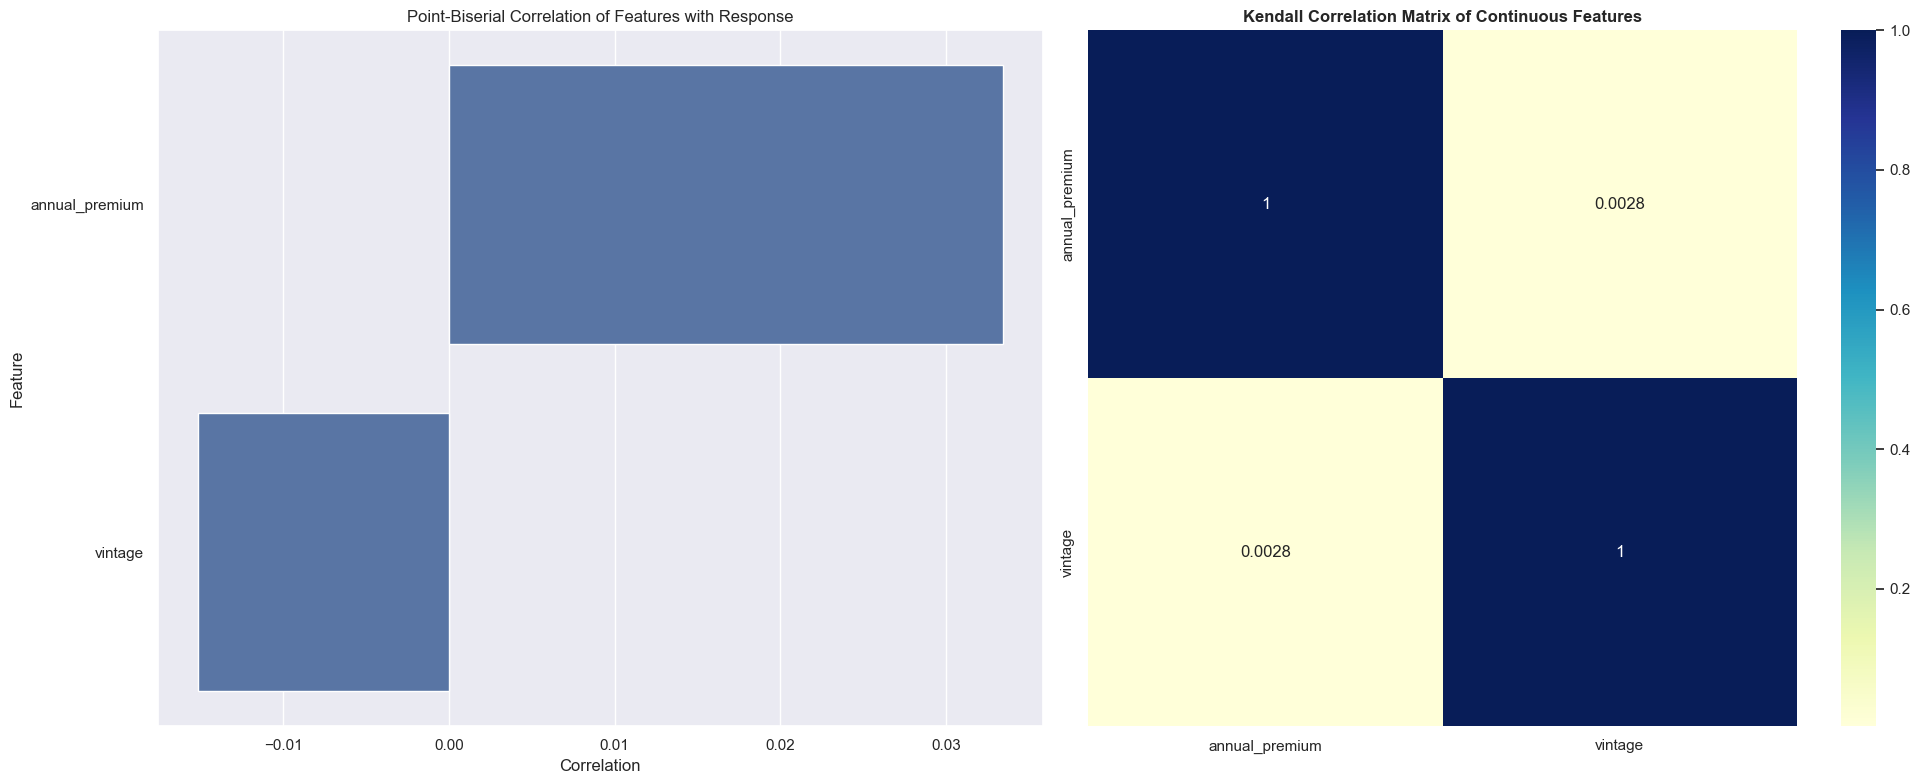

In [94]:
from scipy.stats import pointbiserialr
continuous_features = ['annual_premium', 'vintage'] 
point_biserial_corr = {}
for feature in continuous_features:
    corr, _ = pointbiserialr(train_df1[feature], train_df1['response'])
    point_biserial_corr[feature] = corr
correlations_df = pd.DataFrame(list(point_biserial_corr.items()), columns=['Feature', 'Correlation'])

fig, axes = plt.subplots(1, 2, figsize=(20, 8))

sns.barplot(ax=axes[0], x='Correlation', y='Feature', data=correlations_df)
axes[0].set_title('Point-Biserial Correlation of Features with Response')
axes[0].set_xlabel('Correlation')
axes[0].set_ylabel('Feature')

sns.heatmap(train_df1[continuous_features].corr(method = 'kendall'),cmap="YlGnBu",annot=True)
axes[1].set_title('Kendall Correlation Matrix of Continuous Features', fontdict={'fontsize':12, 'fontweight':'bold'})

plt.tight_layout()
plt.show()



# Model Building

In [101]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
X = train_df1.drop(['response'],axis=1)
X = pd.get_dummies(X, drop_first=True)
y = train_df1['response'] 
X_train, X_test, y_train, y_test= train_test_split(X, y,test_size = 0.2, random_state =42)
X_train.shape, X_test.shape

((9203838, 13), (2300960, 13))

Logistic Regression

In [100]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [103]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

logreg = LogisticRegression(max_iter=1000)  #
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_logreg))

Logistic Regression Accuracy: 0.8769065955079619
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.88      1.00      0.93   2017776
           1       0.40      0.00      0.00    283184

    accuracy                           0.88   2300960
   macro avg       0.64      0.50      0.47   2300960
weighted avg       0.82      0.88      0.82   2300960



In [106]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

lasso_logreg = LogisticRegression(penalty='l1', solver='saga', max_iter=1000, class_weight='balanced')
lasso_logreg.fit(X_train, y_train)
y_pred_lasso = lasso_logreg.predict(X_test)

print("Lasso Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lasso))
print("Lasso Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_lasso))


Lasso Logistic Regression Accuracy: 0.6579571135526041
Lasso Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.62      0.76   2017776
           1       0.26      0.96      0.41    283184

    accuracy                           0.66   2300960
   macro avg       0.63      0.79      0.58   2300960
weighted avg       0.90      0.66      0.72   2300960



In [107]:
# Ridge Logistic Regression
ridge_logreg = LogisticRegression(penalty='l2', solver='lbfgs', max_iter=1000, class_weight='balanced')
ridge_logreg.fit(X_train, y_train)
y_pred_ridge = ridge_logreg.predict(X_test)

print("Ridge Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_ridge))
print("Ridge Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_ridge))


Ridge Logistic Regression Accuracy: 0.6568280196092066
Ridge Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.61      0.76   2017776
           1       0.26      0.96      0.41    283184

    accuracy                           0.66   2300960
   macro avg       0.63      0.79      0.58   2300960
weighted avg       0.90      0.66      0.72   2300960



Tree-based Models
Random Forest

In [109]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

# Logistic Regression with class weights to handle imbalance
logreg = LogisticRegression()
logreg.fit(X_res, y_res)
y_pred_logreg = logreg.predict(X_test)

print("Logistic Regression with SMOTE Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("Logistic Regression with SMOTE Classification Report:\n", classification_report(y_test, y_pred_logreg))